> # CNN Filter

#### - Convolusion layer(filter)

The most important component in CNN is convolusion layer. It is connected with pixels in receptive field of convolutional layer. This helps network to focus on little low level feature. And next hidden layer can easily combine it to more higher level feature.

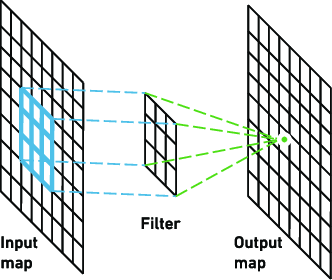


When we handle some images to make model learn them, scale of these images can be different to each other. So, we can add 0s at imgae's row and column. It is called zero padding.

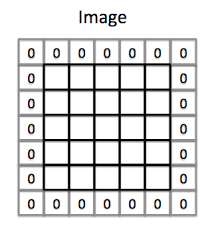

And we can add interval between receptive field. Then big input layer and be connected with much small layer. It highly reduces calculation complexity. The interval is called stride.

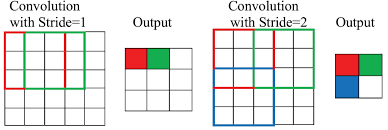

Weights of neurons can be expressed to receptive filed's scale small image. If we apply different filter to input image, we can get different output(feature map) that show feature of input image. So CNN model finds best filter that shows the most useful features during training session.

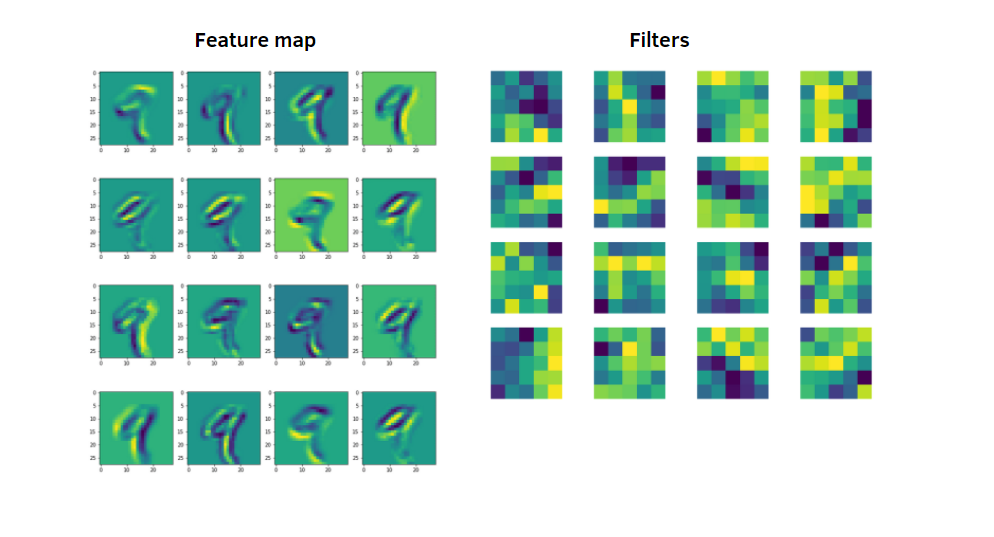

In actual, It is more useful to have various filters and express feature map in 3D. Different filter has different parameter. So model can recognize several features in input image. And input image can have color channel. It usually 3(RGB).

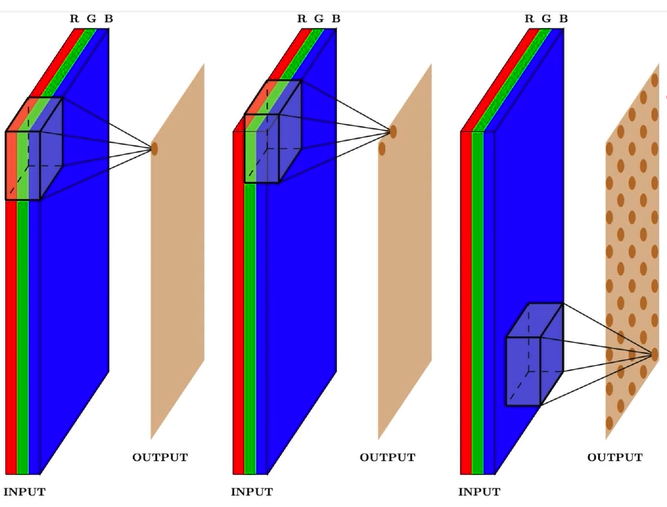

Under fomular is calculating output value.

$ z_{i,j,k} = b_k + \sum^{f_h-1}_{u=0} \sum^{f_w-1}_{v=0} \sum^{f_{n'}-1}_{k'=0} x_{i',j',k'} \times w_{u,v,k',k} $

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")/255
flower = load_sample_image("flower.jpg")/255

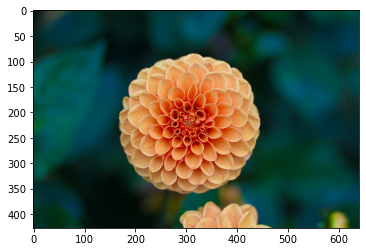

In [3]:
plt.imshow(flower)

In [5]:
images = np.array([china, flower])
batch_size, height, width, channel = images.shape

In [6]:
filters = np.zeros(shape=(7,7, channel, 2), dtype=np.float32)
filters[:,3,:,0] = 1 #수직
filters[3,:,:,1] = 1 #수평

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

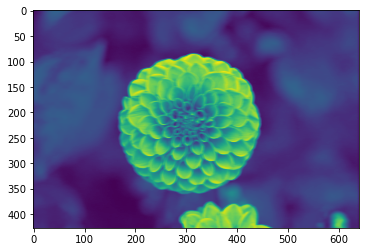

In [15]:
plt.imshow(outputs[1,:,:,1])

Above code express each pixel float value 0 to 1. And we make two 7X7 filter. One has vertical line and the other has horizen line. Then apply the filters at each image using **tf.nn.conv2d** function. This method uses zero padding and 1 stride. Last, draw a feature map.

more about **tf.nn.conv2d**. stride can be a 1D array not only scalar. padding can be "SAME" or "VALID". If we use "VALID", we don't use zero padding. "SAME" is method to use zero padding.

In this method we directly set filter. But we usually define filter using trainable weights. So we can train right filter. We use **keras.layers.Conv2D**

In [17]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")

This code sets 32 number filters and 1 stride, "same" padding. And applies RELU activation function to output.

One problem about setting filter is it needs sufficient RAM size. Soemtimes we fail training because of lack of memory. Then we can reduce mini-batch size. And we can also use strides, etc.